In [13]:
import pandas as pd

In [14]:
# Load the dataset
file_path = '../cleaned_data_without_duplicates.csv'
df = pd.read_csv(file_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38931 entries, 0 to 38930
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                38931 non-null  int64  
 1   job_blue-collar    38931 non-null  int64  
 2   job_entrepreneur   38931 non-null  int64  
 3   job_housemaid      38931 non-null  int64  
 4   job_management     38931 non-null  int64  
 5   job_retired        38931 non-null  int64  
 6   job_self-employed  38931 non-null  int64  
 7   job_services       38931 non-null  int64  
 8   job_student        38931 non-null  int64  
 9   job_technician     38931 non-null  int64  
 10  job_unemployed     38931 non-null  int64  
 11  marital_single     38931 non-null  int64  
 12  marital_married    38931 non-null  int64  
 13  marital_divorced   38931 non-null  int64  
 14  education          38931 non-null  int64  
 15  default            38931 non-null  int64  
 16  housing            389

In [15]:
df['poutcome'].value_counts()

poutcome
-1    33441
 0     4142
 1     1348
Name: count, dtype: int64

In [16]:
df['y'].value_counts()

y
0    34380
1     4551
Name: count, dtype: int64

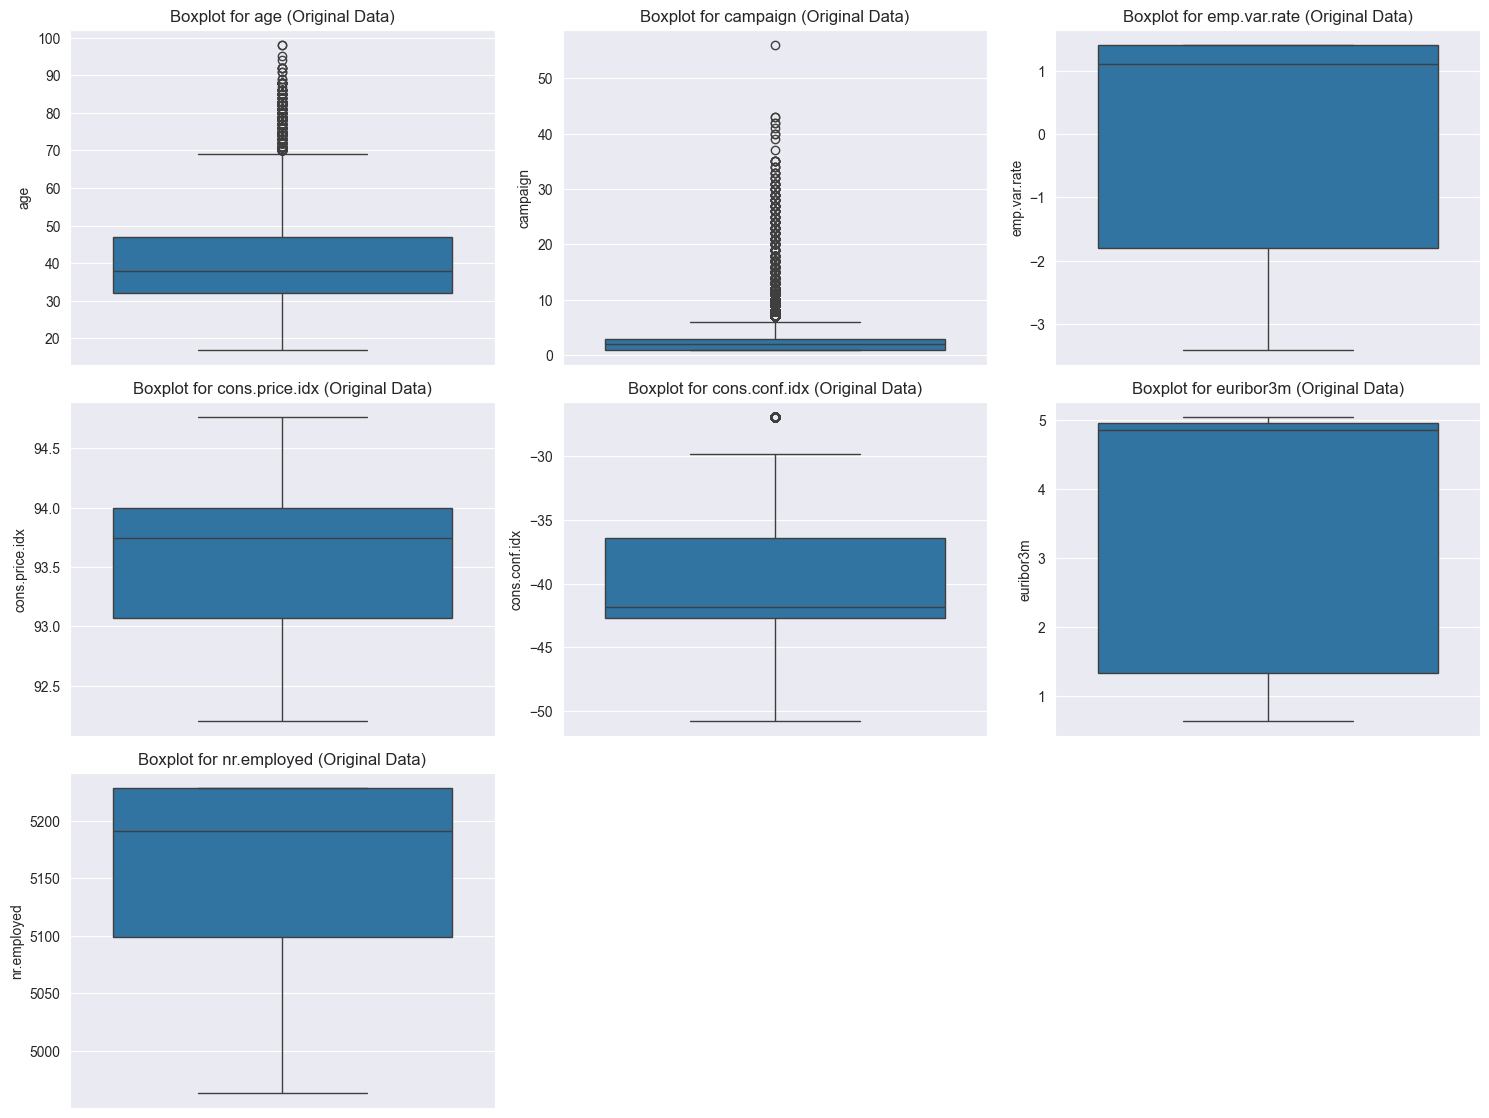

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define numerical columns excluding 'age'
numerical_cols = ['age','campaign', 'emp.var.rate','cons.price.idx',
                  'cons.conf.idx', 'euribor3m', 'nr.employed']

plt.figure(figsize=(15, 15))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot for {col} (Original Data)')
plt.tight_layout()
plt.show()

In [8]:
import numpy as np

def handle_outliers(df, cols):
    for col in cols:
        # Calculate IQR
        q1 = np.percentile(df[col], 25)
        q3 = np.percentile(df[col], 95)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        # Cap values to the bounds
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    return df

# List of numerical columns excluding 'age'
numerical_cols = ['age','campaign', 'emp.var.rate', 'cons.price.idx',
                  'cons.conf.idx', 'euribor3m', 'nr.employed']

# Apply the function
df = handle_outliers(df, numerical_cols)

In [9]:
df[numerical_cols].describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,38931.000000,38931.000000,38931.0,38931.000000,38931.000000,38931.000000,38931.000000,38931.000000,38931.000000
mean,40.074927,2.568262,999.0,0.171842,0.061707,93.576503,-40.512977,3.598337,5165.914752
std,10.444506,2.430812,0.0,0.458148,1.576393,0.583641,4.644270,1.742654,72.772858
min,17.000000,1.000000,999.0,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,1.000000,999.0,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,2.000000,999.0,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,3.000000,999.0,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,97.000000,16.000000,999.0,2.500000,1.400000,94.767000,-26.900000,5.045000,5228.100000


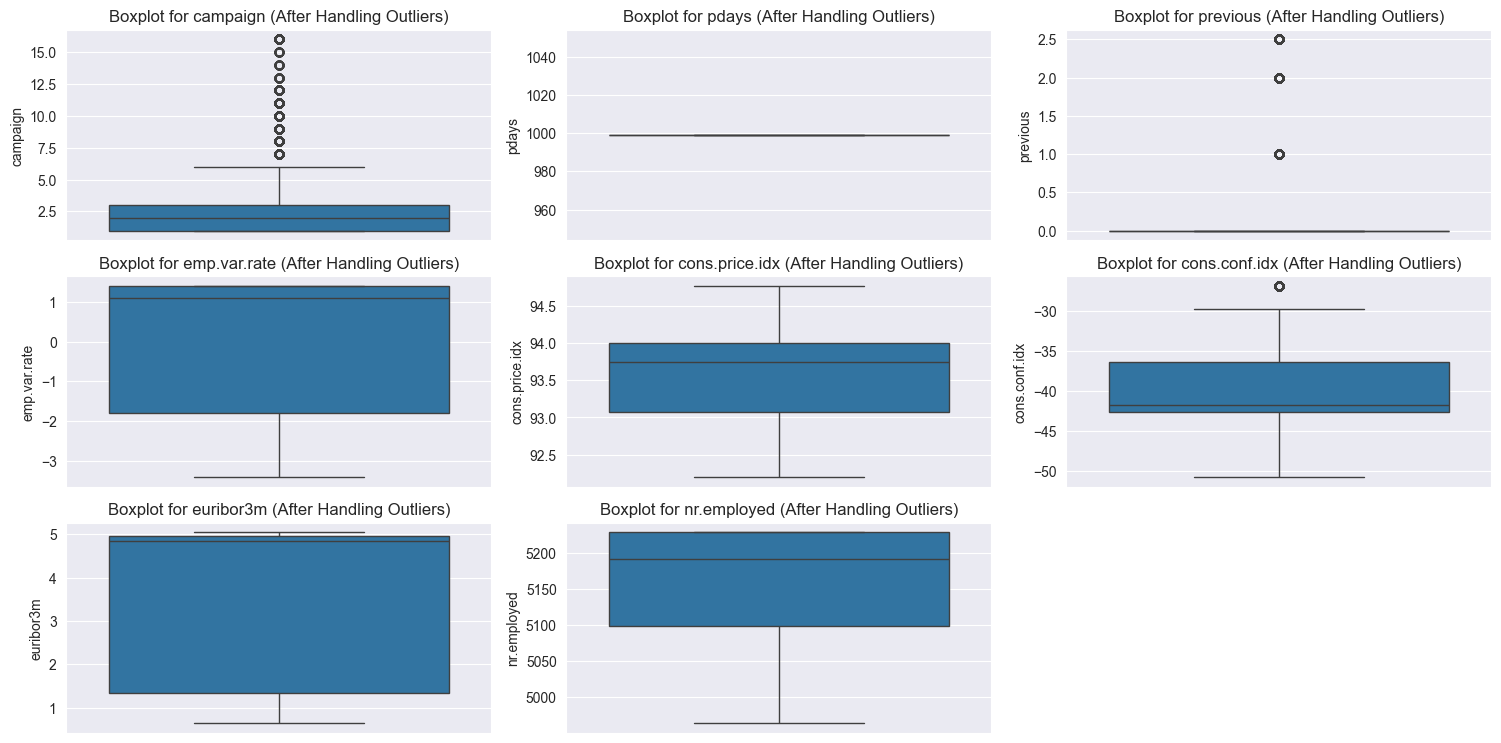

In [6]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot for {col} (After Handling Outliers)')
plt.tight_layout()
plt.show()